In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


### Import data

#### A company which is active in Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. 

#### Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training. 

In [2]:
df = pd.read_csv('aug_train.csv')
#drop the first and second columns
df = df.drop(['enrollee_id', 'city'], axis=1)

In [3]:
df.head().T


,0,1,2,3,4
city_development_index,0.92,0.776,0.624,0.789,0.767
gender,Male,Male,NaN,NaN,Male
relevent_experience,Has relevent experience,No relevent experience,No relevent experience,No relevent experience,Has relevent experience
enrolled_university,no_enrollment,no_enrollment,Full time course,NaN,no_enrollment
education_level,Graduate,Graduate,Graduate,Graduate,Masters
major_discipline,STEM,STEM,STEM,Business Degree,STEM
experience,>20,15,5,<1,>20
company_size,NaN,50-99,NaN,NaN,50-99
company_type,NaN,Pvt Ltd,NaN,Pvt Ltd,Funded Startup
last_new_job,1,>4,never,never,4


#### Find the size of the dataframe

In [4]:
#your code here

#### Find the columns name and their types (numerical or categorical)

In [6]:
#your code here

#### Find the list of `numerical` columns and `categorical` columns

- use DataFrame.select_dtypes() to select columns of a specific type
- For numerical columns you can pass `include = ['int64', 'float64']` as argument and for categorical columns you can pass `include = ['object']` as argument

In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols 

['city_development_index', 'training_hours', 'target']

In [11]:
num_cols = num_cols[:-1]
num_cols

['city_development_index', 'training_hours']

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

### Handling missing values

#### Missing values in `numerical` columns are replaced by the `mean` of the respective column

In [13]:
num_cols 

['city_development_index', 'training_hours']

In [14]:
replacement = {'city_development_index': df['city_development_index'].mean(), 
               'training_hours': df['training_hours'].mean()} 

df.fillna(replacement, inplace=True)
df[num_cols].isnull().sum()

city_development_index    0
training_hours            0
dtype: int64

#### Missing values in `categorical` columns are replaced by the `mode` of the respective column

#### Note:  `mode` is the most frequency value of that column..

In [15]:
#your code here

## Exploratory Data Analysis (EDA) of numerical columns

#### Scatter plot the Percent of Change Job vs city_development_index (groupby city_development_index)

In [19]:
#you code here

Text(0.5, 1.0, 'Bubble size represents the number of people \n wanting to change job in each group (optional)')

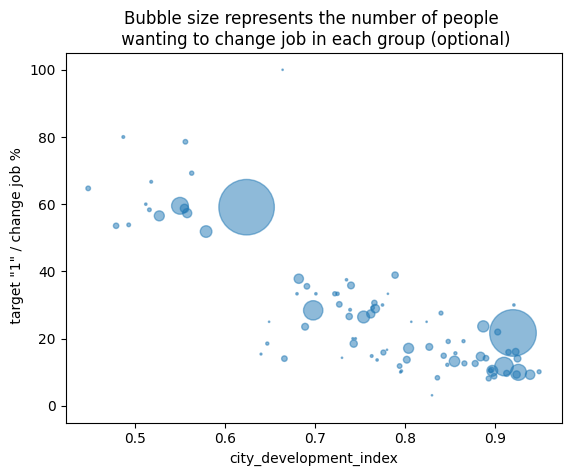

#### Scatter plot the Percent of Change Job vs training_hours

In [ ]:
#your code here

#### Do you see any correlation between numerical columns and Percent of Change Job?

## EDA of categorical columns

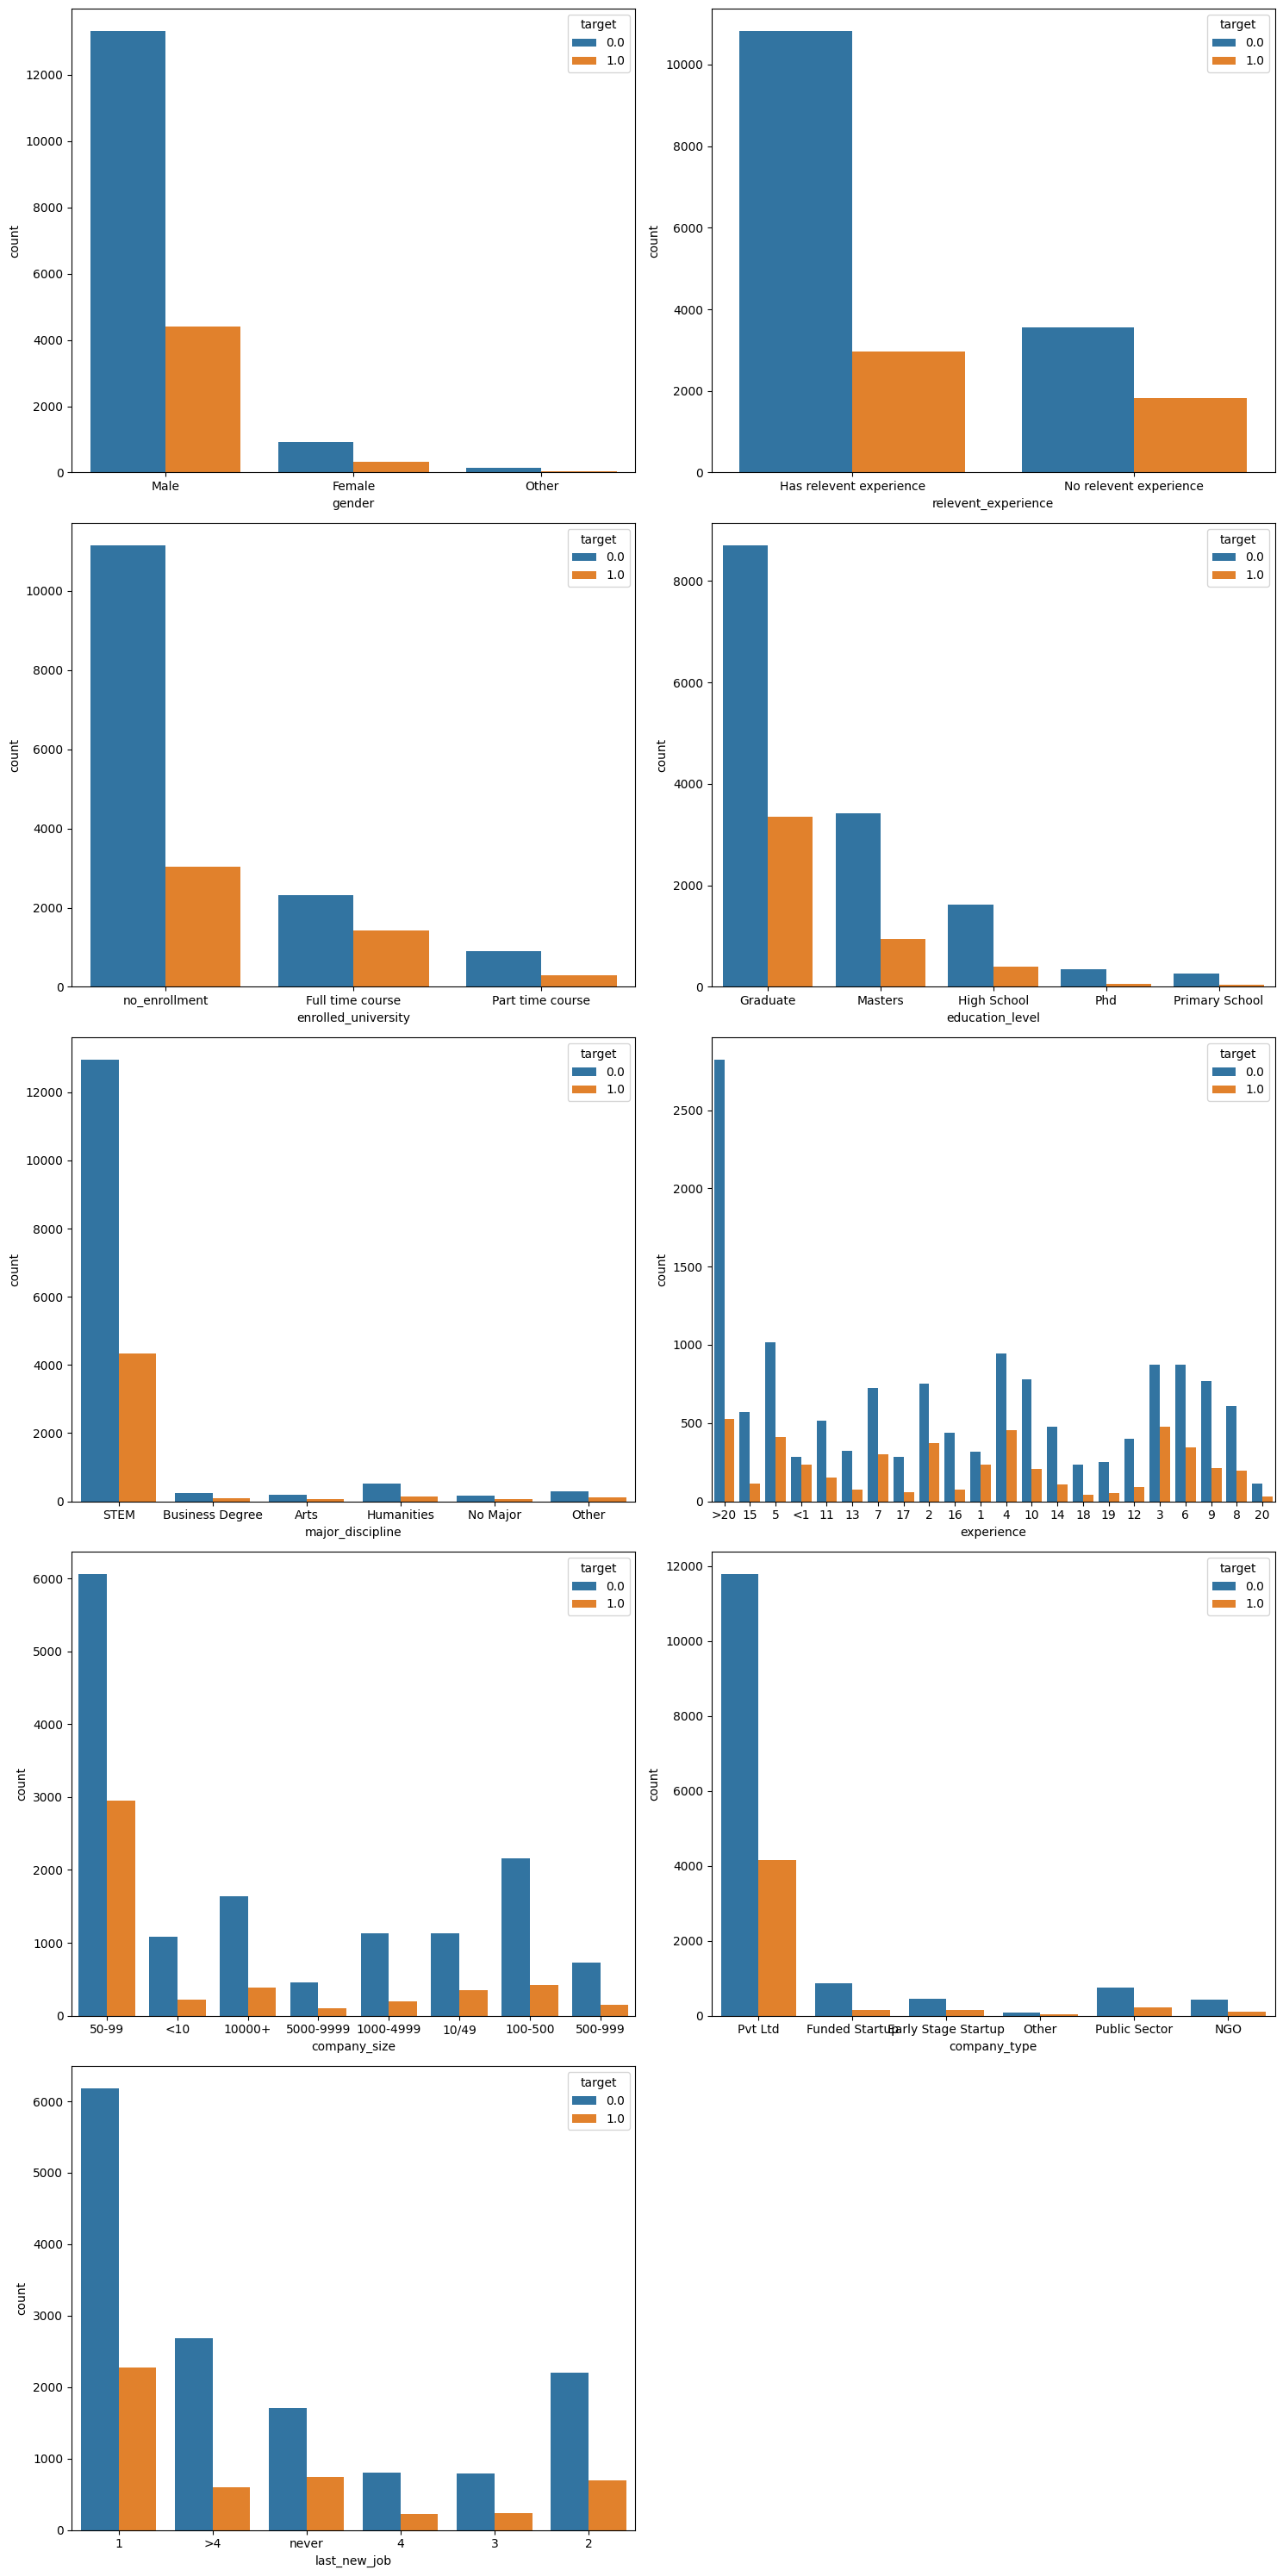

In [22]:
plt.figure(figsize=(15,30))
for i in range(len(cat_cols)):
    plt.subplot(5,2,i+1)
    sns.countplot(data=df, x=cat_cols[i],hue=df['target'])
plt.tight_layout()
plt.show()

#### Plot percent of people changing job based on categorical columns

In [23]:
#your code here

#### Can you find any interesting insight from the plots?

## Feature Engineering/ Transformation

In [25]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

### Seperate `categorical` columns into `oridinal` and `one-hot` columns 

To determine whether the `categorical` data from the plots are `ordinal` or should be `one-hot` encoded, let's define the terms briefly:

1. **Ordinal:** Categorical data that has a meaningful order or ranking. For example, "Education Level" (e.g., Primary School < High School < Graduate < Masters < PhD).

2. **One-Hot Encoding:** Categorical data that has no inherent order. For example, "Gender" (e.g., Male, Female, Other).

### Analysis of the Categorical features

#### `Gender`
- **Categories**: Male, Female, Other
- **Encoding**: One-hot encoding (no meaningful order).

#### `Relevant Experience`
- **Categories**: Has relevant experience, No relevant experience
- **Encoding**: Ordinal (implies a progression).

#### `Enrollment in University`
- **Categories**: No enrollment, Full-time course, Part-time course
- **Encoding**: Ordinal (implies a progression of engagement).

#### `Education Level`
- **Categories**: Primary School, High School, Graduate, Masters, PhD
- **Encoding**: Ordinal (clear order based on education progression).

#### `Major Discipline`
- **Categories**: STEM, Business Degree, Arts, Humanities, No Major, Other
- **Encoding**: One-hot encoding (no intrinsic ranking).

#### `Experience`
- **Categories**: Various numerical ranges (e.g., <1, 1, 2, ..., >20)
- **Encoding**: Ordinal (implies increasing years of experience).

#### `Company Size`
- **Categories**: <10, 10–49, ..., 10000+
- **Encoding**: Ordinal (implies increasing size).

#### `Company Type`
- **Categories**: Pvt Ltd, Funded Startup, NGO, Public Sector, etc.
- **Encoding**: One-hot encoding (no inherent order among types).

#### `Last New Job`
- **Categories**: never, 1, 2, 3, >4
- **Encoding**: Ordinal (increasing time since last new job).


#### List of ordinal columns and one-hot columns

In [26]:
cat_ordinal = ['experience', 'company_size', 'last_new_job',
               'relevent_experience', 'enrolled_university', 'education_level']

cat_one_hot = ['gender', 'major_discipline', 'company_type']


### Ordinal Encoding (6 columns/features)

#### `experience` feature encoding

In [27]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20'],
      dtype=object)

In [28]:
experience_map = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 

In [29]:
# column before encoding
df['experience']

0        >20
1         15
2          5
3         <1
4        >20
        ... 
19153     14
19154     14
19155    >20
19156     <1
19157      2
Name: experience, Length: 19158, dtype: object

In [30]:
df['experince_encoded'] = df['experience'].map(experience_map)
df['experince_encoded']

0        21
1        15
2         5
3         0
4        21
         ..
19153    14
19154    14
19155    21
19156     0
19157     2
Name: experince_encoded, Length: 19158, dtype: int64

#### `company_size` feature encoding

In [31]:
df['company_size'].unique()

array(['50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [32]:
company_size_map = {
    '10/49'      :    0,
    '<10'        :    1, 
    '50-99'      :    2,
    '100-500'    :    3, 
    '500-999'    :    4, 
    '1000-4999'  :    5, 
    '5000-9999'  :    6, 
    '10000+'     :    7
    
}

In [33]:
df['company_size']

0          50-99
1          50-99
2          50-99
3          50-99
4          50-99
          ...   
19153      50-99
19154      50-99
19155      50-99
19156    500-999
19157      50-99
Name: company_size, Length: 19158, dtype: object

In [34]:
df['company_size_encoded'] = df['company_size'].map(company_size_map)
df['company_size_encoded']

0        2
1        2
2        2
3        2
4        2
        ..
19153    2
19154    2
19155    2
19156    4
19157    2
Name: company_size_encoded, Length: 19158, dtype: int64

#### `last_new_job` feature encoding

In [35]:
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

In [36]:
last_new_job_map = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

In [37]:
df['last_new_job']

0            1
1           >4
2        never
3        never
4            4
         ...  
19153        1
19154        4
19155        4
19156        2
19157        1
Name: last_new_job, Length: 19158, dtype: object

In [38]:
df['last_new_job_encoded'] = df['last_new_job'].map(last_new_job_map)
df['last_new_job_encoded']

0        1
1        5
2        0
3        0
4        4
        ..
19153    1
19154    4
19155    4
19156    2
19157    1
Name: last_new_job_encoded, Length: 19158, dtype: int64

#### `relevent_experience` feature encoding 

In [39]:
#your code here

#### `enrolled_university` feature encoding

In [41]:
#your code here

#### `education_level` feature encoding

In [43]:
#your code here

### Next drop the original ordinal columns from the dataframe and just keep encoded columns

In [45]:
#your code here

### One-Hot Encoding (3 columns/features)

In [47]:
cat_one_hot

['gender', 'major_discipline', 'company_type']

In [48]:
df = pd.get_dummies(df, columns=cat_one_hot, dtype=int)

In [49]:
df.head().T

,0,1,2,3,4
city_development_index,0.92,0.776,0.624,0.789,0.767
training_hours,36.00,47.000,83.000,52.000,8.000
target,1.00,0.000,0.000,1.000,0.000
experince_encoded,21.00,15.000,5.000,0.000,21.000
company_size_encoded,2.00,2.000,2.000,2.000,2.000
last_new_job_encoded,1.00,5.000,0.000,0.000,4.000
relevent_experience_encoded,1.00,0.000,0.000,0.000,1.000
enrolled_university_encoded,0.00,0.000,2.000,0.000,0.000
education_level_encoded,2.00,2.000,2.000,2.000,3.000
gender_Female,0.00,0.000,0.000,0.000,0.000


#### What happend to the `gender` column? What about the `major_discipline` and `company_type` columns?

`gender` column turned into three on-hot columns: `gender_Female`, `gender_Male`, `gender_Other`

### Now all features are numbers and ready for the machine learning model

In [50]:
X_cols = list(df.columns)
X_cols.remove('target')
X_cols

['city_development_index',
 'training_hours',
 'experince_encoded',
 'company_size_encoded',
 'last_new_job_encoded',
 'relevent_experience_encoded',
 'enrolled_university_encoded',
 'education_level_encoded',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'major_discipline_Arts',
 'major_discipline_Business Degree',
 'major_discipline_Humanities',
 'major_discipline_No Major',
 'major_discipline_Other',
 'major_discipline_STEM',
 'company_type_Early Stage Startup',
 'company_type_Funded Startup',
 'company_type_NGO',
 'company_type_Other',
 'company_type_Public Sector',
 'company_type_Pvt Ltd']

In [51]:
X = df[X_cols]
y = df['target']

#### Implement Logestic Regression model to predict the target column
#### Use cross validation (`cv=5`) to split the data and evulate the model

 - Use `GridSearchCV()` method and pass `model`, `param_grid={}`, `cv=5` as arguments
 - Use `cv_results_` attribute over your `grid` object to get the results of the cross validation 

Cross Validation (Review)

We used to split the dataset to test and train using `train_test_split` function. However we can also use `cross-validation` to split the dataset `X` and `y`. 

For example, if we use `cv=5`, the dataset will be split into 5 parts. 4 parts will be used for training and 1 part will be used for testing. This process will be repeated 5 times and the average accuracy will be calculated.

<img src="./cross_validation.jpg" width="800" hight="200" /> 

In [52]:
#your code here


#### Plot boxplot of the cross validation results (test score of splits)
#### To visualize the `maximum`, `minimum`, `median`, `first quartile` and `third quartile` of the cross validation results

In [56]:
#your code here

{'whiskers': [<matplotlib.lines.Line2D at 0x2733fa80f10>,
 'caps': [<matplotlib.lines.Line2D at 0x2733fa82210>,
 'boxes': [<matplotlib.lines.Line2D at 0x2733fa62dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2733fa832d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2733fa83b50>],
 'means': []}

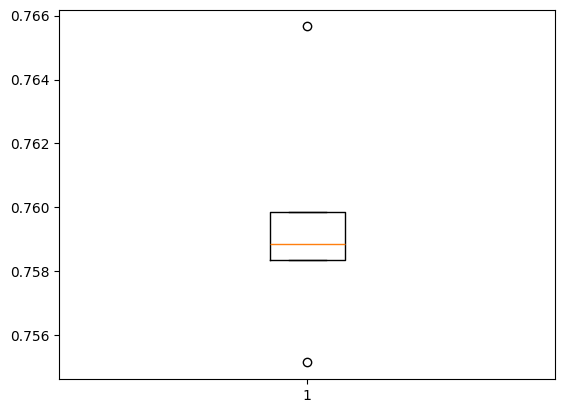

#### Repeat the training and testing process with `RandomForestClassifier` model and plot the results in a boxplot. Which model is better?

In [59]:
#your code here